# **Problem Statement:**
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know: • Which variables are important to predict the price of variable? • How do these variables describe the price of the house?

# **Business Goal:**
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

# **Technical Requirements:**



•    Data contains 1460 entries each having 81 variables.

•    Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

•    Extensive EDA has to be performed to gain relationships of important variable and price.

•    Data contains numerical as well as categorical variable. You need to handle them accordingly.

•    You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters. 

•    You need to find important features which affect the price positively or negatively.


In [1]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('/content/drive/MyDrive/Python_Datasets/H_train.csv')
#pd.set_option('display.max_columns',None)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,...,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,...,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,...,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,...,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,...,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
df_test=pd.read_csv('/content/drive/MyDrive/Python_Datasets/H_test.csv')
#pd.set_option('display.max_rows',None)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [4]:
print("No: of Rows and columns for Train data set : ",df_train.shape)
print("No: of Rows and columns for Test data set  : ",df_test.shape)

No: of Rows and columns for Train data set :  (1168, 81)
No: of Rows and columns for Test data set  :  (292, 80)


**Observation:**

Observation from above code it states that in test data set we have missing columns. Target column "SalePrice" is missing in test data set.Now lets combine both the train & test datasets. Concat them as one dataset for our analysis. So that it is easy for doing EDA and other processes. Later at time of model building we can split them again..

In [5]:
df_train["dataset_type"]="Train"
df_test["dataset_type"]="Test"

In [6]:
df_concat=pd.concat([df_train,df_test],ignore_index=True)

In [7]:
df_concat.shape

(1460, 82)

In [8]:
df_concat["dataset_type"].value_counts()

Train    1168
Test      292
Name: dataset_type, dtype: int64

In [9]:
df_concat.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
dataset_type        2
Length: 82, dtype: int64

In [10]:
df_concat.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
dataset_type      object
Length: 82, dtype: object

In [11]:
df_concat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,...,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0,Train
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,...,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0,Train
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,...,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0,Train
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,...,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0,Train
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,...,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0,Train


**Observation:**

 We can observe that there are Nan values in the dataset after concatinating. So lets handle them first.

In [12]:
df_concat.isnull().sum()[df_concat.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
SalePrice        292
dtype: int64

**Observation:**

 We can notice that some null values after merging the 2 datasets. Lets fix it first.

In [13]:
df_concat.select_dtypes(include='object').isnull().sum()[df_concat.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

**Observation:** 

We have filtered the Objects columns alone with null values

In [14]:
df_concat.select_dtypes(include=['int64','float']).isnull().sum()[df_concat.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
SalePrice      292
dtype: int64

**Observation:** 

We have filtered the Numeric columns alone with null values

In [15]:
df_concat['LotFrontage'].value_counts().sum()

1201

In [16]:
df_concat['LotFrontage'].median()

69.0

In [17]:
df_concat['MasVnrArea'].median()

0.0

In [18]:
df_concat['LotFrontage'] = df_concat['LotFrontage'].replace(np.nan, df_concat['LotFrontage'].median())
df_concat['MasVnrArea'] = df_concat['MasVnrArea'].replace(np.nan, df_concat['MasVnrArea'].median())

In [19]:
df_concat['GarageYrBlt']=df_concat['GarageYrBlt'].fillna(0)
df_concat['GarageYrBlt'] = df_concat['GarageYrBlt'].astype(int)

**Observation:** 

First Numerical columns have been handled for removing Null Values in above block of codes.

In [20]:
print(df_concat.Alley.value_counts())
print('')
print(df_concat.Street.value_counts())
print(" ")
print(df_concat.Utilities.value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64
 
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [21]:
df_concat = df_concat.drop(['Alley','Street','Utilities','PoolQC','Fence','MiscFeature','Id'],axis='columns')

**Observation:**

 Removing some columns as mentioned above since class values in each columns are one sided i.e. more than 95% of data in that columns are of same value or with only one data class

In [22]:
df_concat.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [23]:
df_concat.MasVnrType.fillna('None',inplace=True)
df_concat.BsmtQual.fillna('TA',inplace=True)
df_concat.BsmtCond.fillna('TA',inplace=True)
df_concat.BsmtExposure.fillna('No',inplace=True)
df_concat.BsmtFinType1.fillna('Unf',inplace=True)
df_concat.BsmtFinType2.fillna('Unf',inplace=True)
df_concat.GarageType.fillna('Attchd',inplace=True)
df_concat.GarageFinish.fillna('Unf',inplace=True)
df_concat.GarageQual.fillna('TA',inplace=True)
df_concat.GarageCond.fillna('TA',inplace=True)
df_concat.Electrical.fillna('SBrkr',inplace=True)
df_concat.FireplaceQu.fillna('Gd',inplace=True)

In [24]:
df_concat.select_dtypes(include='object').isnull().sum()[df_concat.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [25]:
# Check if there are any duplicate values in the dataset

df_concat[df_concat.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type


**Observation:** 

In above set of block of codes we have replaced or removed the null values for object columns

In [26]:
df_concat.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,120,RL,69.0,4928,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,0,2,2007,WD,Normal,128000.0,Train
1,20,RL,95.0,15865,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,0,10,2007,WD,Normal,268000.0,Train
2,60,RL,92.0,9920,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,0,6,2007,WD,Normal,269790.0,Train
3,20,RL,105.0,11751,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,0,1,2010,COD,Normal,190000.0,Train
4,20,RL,69.0,16635,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,0,6,2009,WD,Normal,215000.0,Train


# **EDA(EXPLORATORY DATA ANALYSIS)**

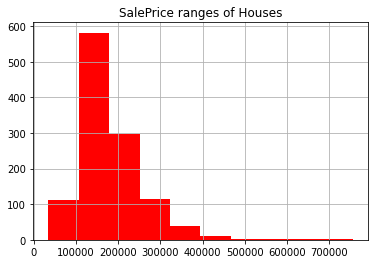

In [27]:
df_train["SalePrice"].hist(grid=True,color='red')
plt.title("SalePrice ranges of Houses")
plt.show()

**Observation:** 755000 is the max value of sales price

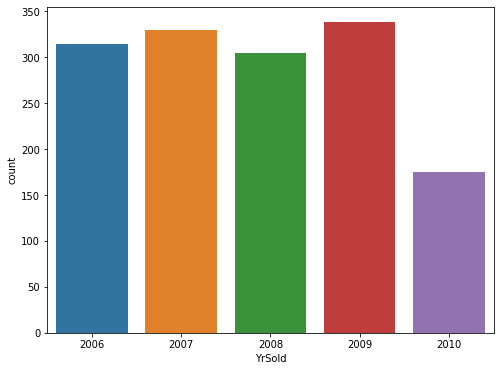

In [28]:
plt.subplots(figsize=(8,6))
sns.countplot(df_concat['YrSold'])

**Observation:** The number of sales in the year 2009 is having the maxium number of sales.

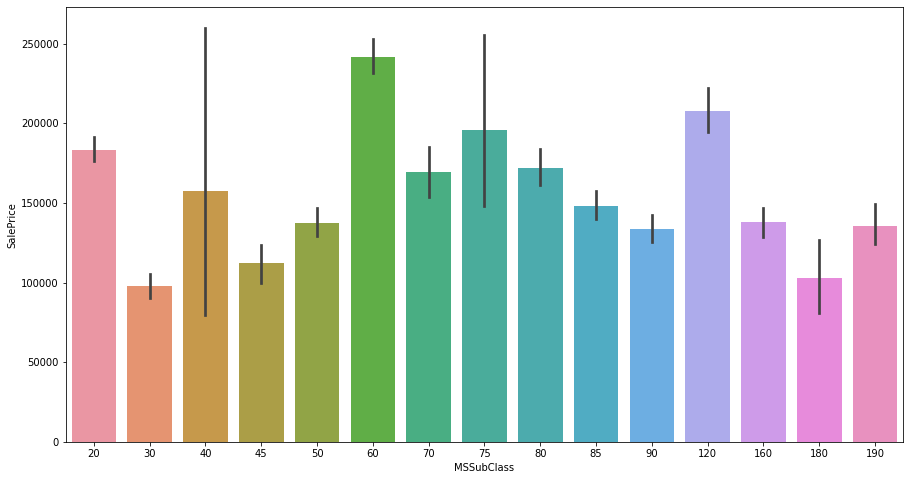

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(x="MSSubClass",y="SalePrice",data=df_concat)
#plt.xticks(rotation=90)
plt.show()

**Observation:** 2-STORY 1946 & NEWER is the kind of class which has the higher sale price.

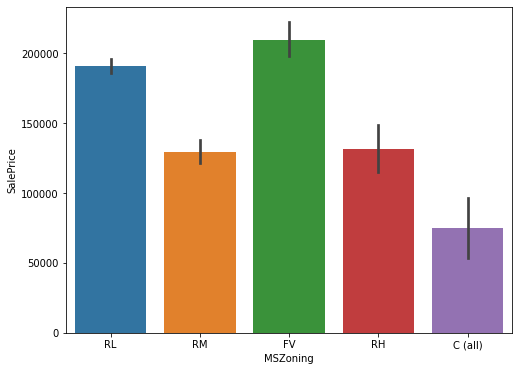

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x="MSZoning",y="SalePrice",data=df_concat)
#plt.xticks(rotation=90)
plt.show()


**Observation:** Floating Village Residential (FV) has the higher value of sales

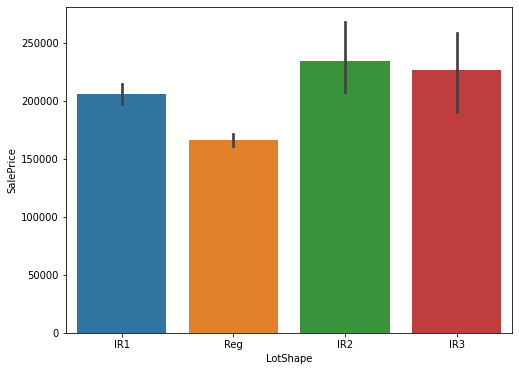

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(x="LotShape",y="SalePrice",data=df_concat)
#plt.xticks(rotation=90)
plt.show()

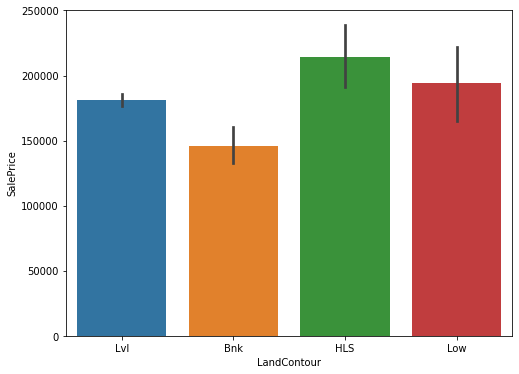

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(x="LandContour",y="SalePrice",data=df_concat)
#plt.xticks(rotation=90)
plt.show()

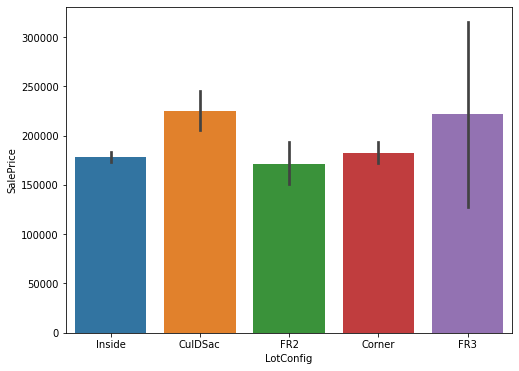

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(x="LotConfig",y="SalePrice",data=df_concat)
#plt.xticks(rotation=90)
plt.show()

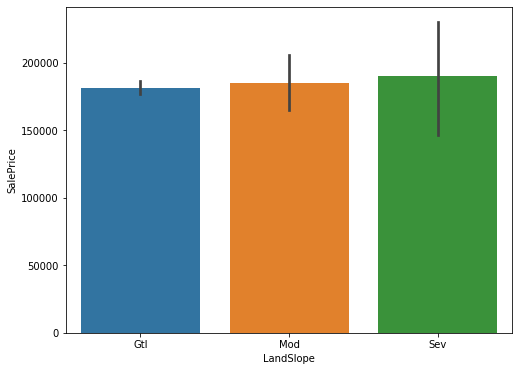

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x="LandSlope",y="SalePrice",data=df_concat)
#plt.xticks(rotation=90)
plt.show()

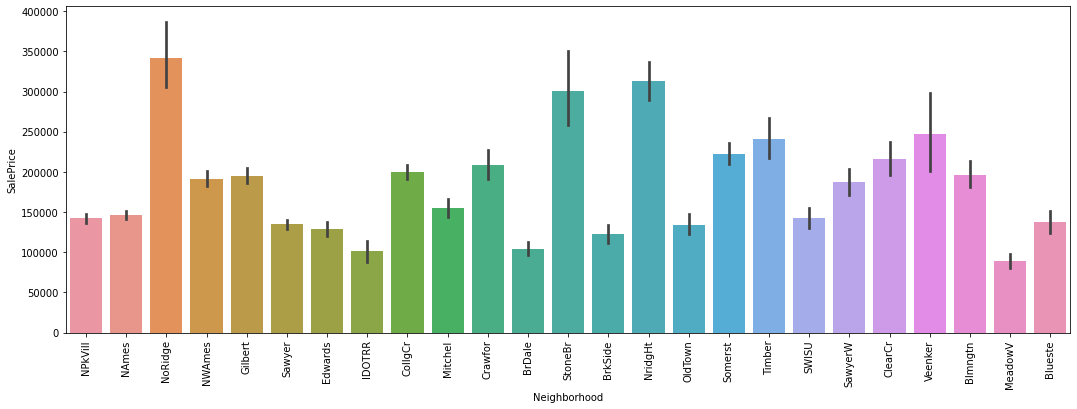

In [35]:
plt.figure(figsize=(18,6))
sns.barplot(x="Neighborhood",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

**Observation:** North Ridge is the Physical locations within Ames city limits has the higher count of saleprices

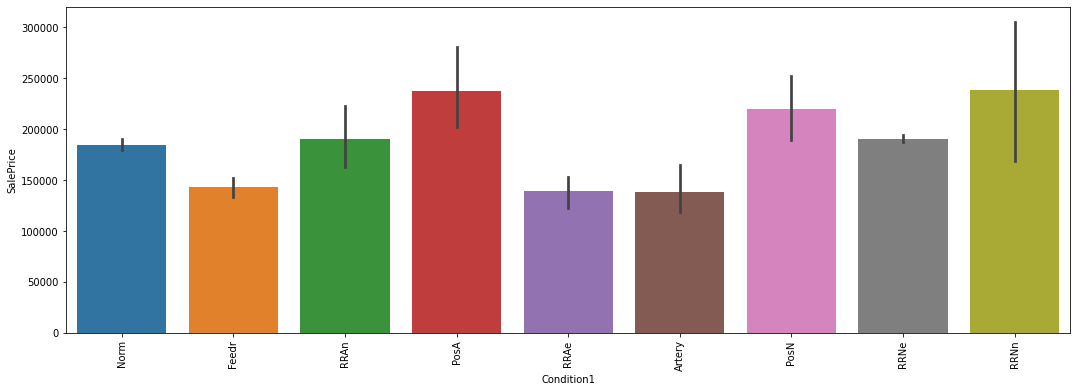

In [36]:
plt.figure(figsize=(18,6))
sns.barplot(x="Condition1",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

**Observation:** PosA Adjacent to postive off-site feature RRNe Within 200' of East-West Railroad these are the two most valued Proximity to various conditions .

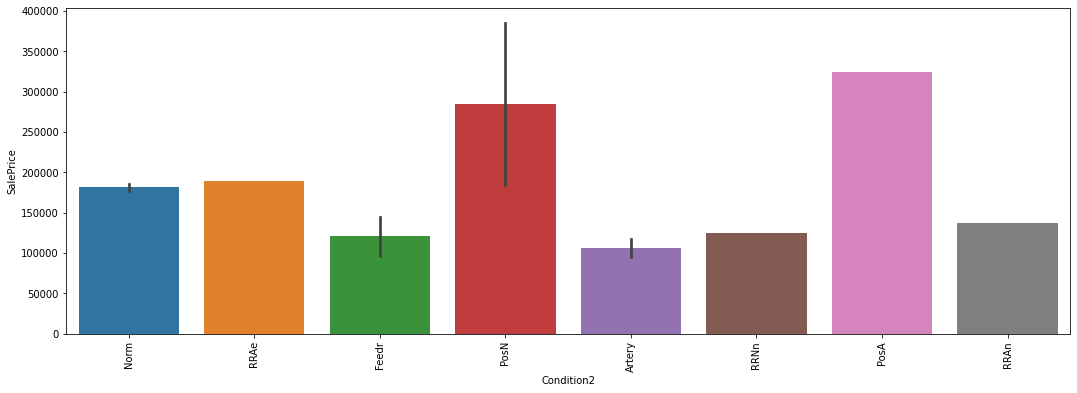

In [37]:
plt.figure(figsize=(18,6))
sns.barplot(x="Condition2",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

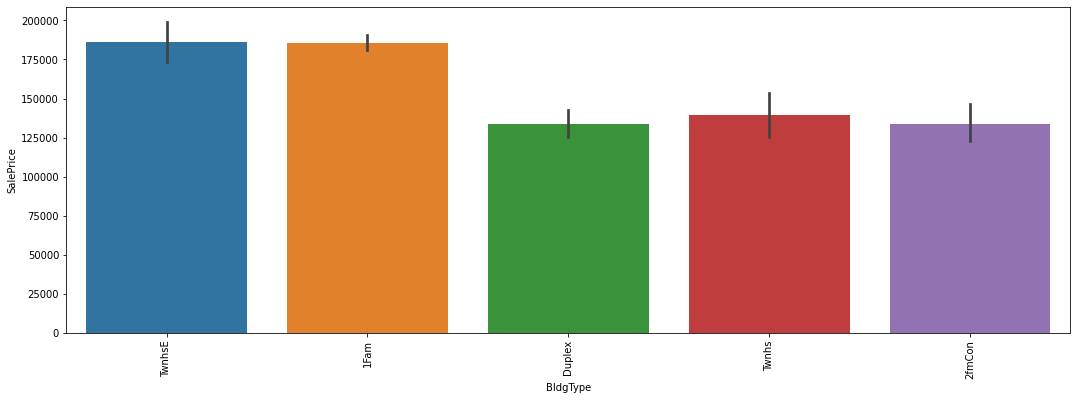

In [38]:
plt.figure(figsize=(18,6))
sns.barplot(x="BldgType",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

**Observation:** TwnhsE Townhouse End Unit 1Fam Single-family Detached are the one which has higher rates of sales .

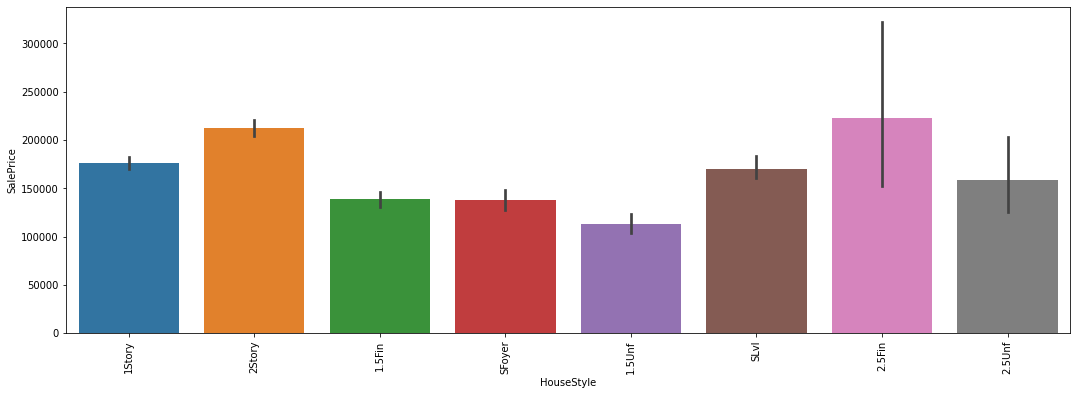

In [39]:
plt.figure(figsize=(18,6))
sns.barplot(x="HouseStyle",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

**Oservation:** 2.5Fin Two and one-half story: 2nd level finished has the higher count of salesprice .

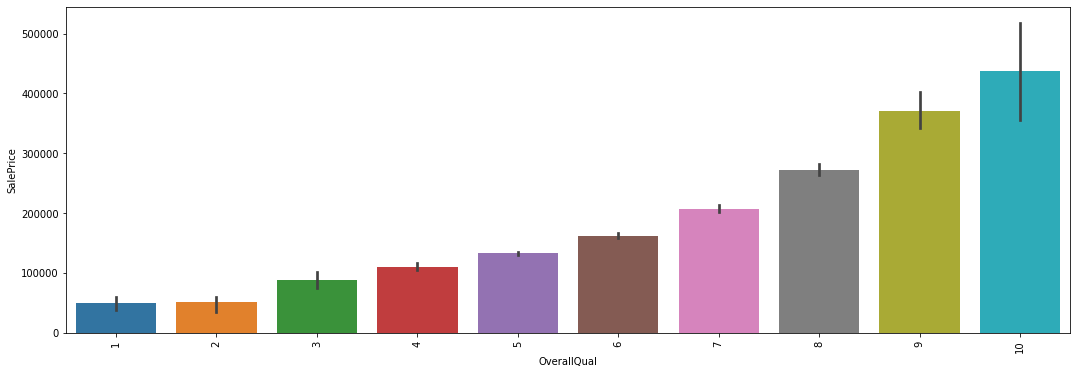

In [40]:
plt.figure(figsize=(18,6))
sns.barplot(x="OverallQual",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

**Observation:** Very Excellent class value has the higher quality and hence higher price values. and the graph shows the slope as the quality increases the Sales Price increases.

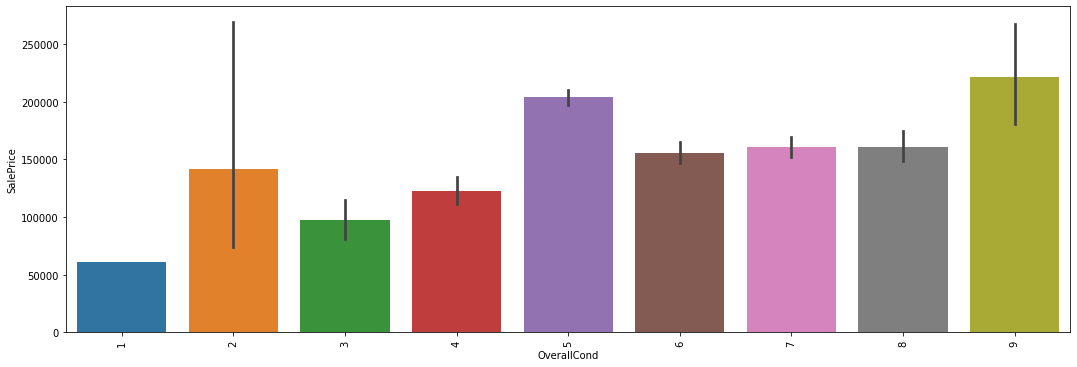

In [41]:
plt.figure(figsize=(18,6))
sns.barplot(x="OverallCond",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

**Observation:** Very Excellent class value has the higher quality and hence higher price values. and the graph shows the slope as the quality increases the Sales Price increases.

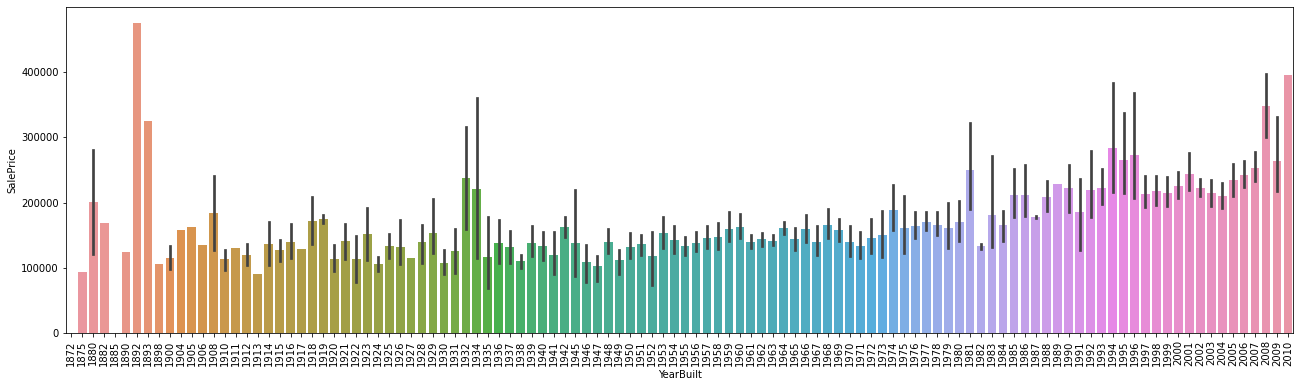

In [42]:
plt.figure(figsize=(22,6))
sns.barplot(x="YearBuilt",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

**Observation:** Year 2010 and year 1892 has the max price in sales .

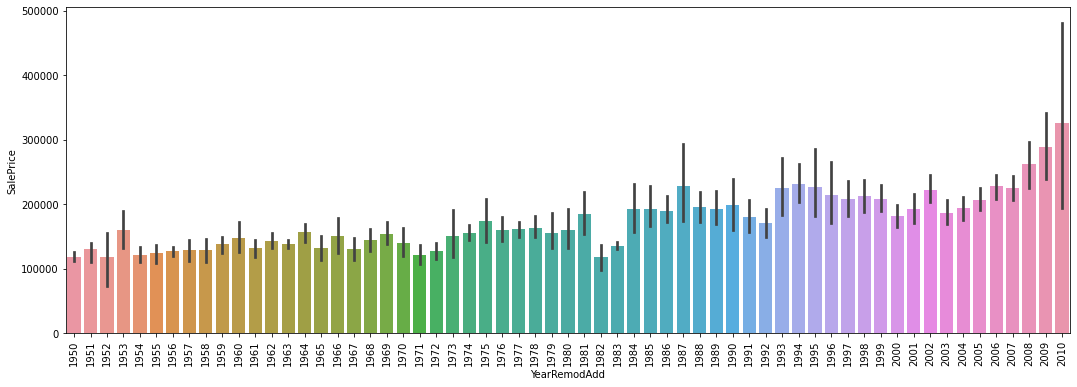

In [43]:
plt.figure(figsize=(18,6))
sns.barplot(x="YearRemodAdd",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

**Observation:** Remodeling is done in year 2010 is of max counts .

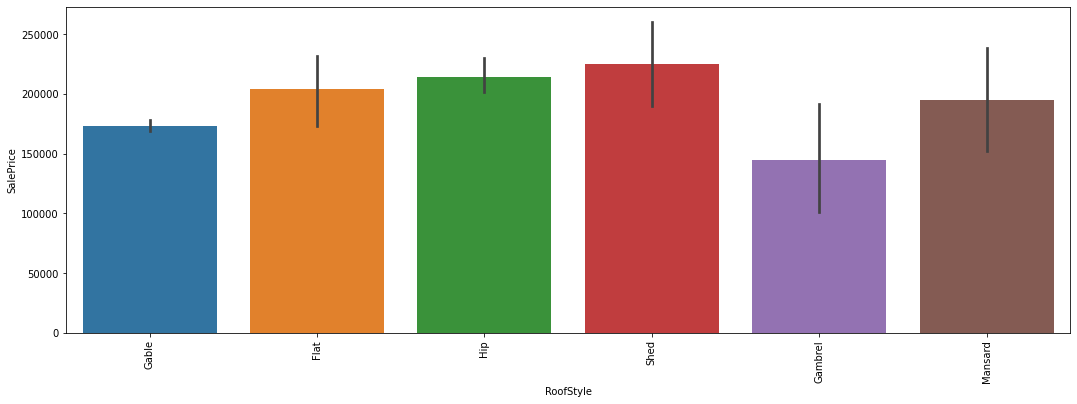

In [44]:
plt.figure(figsize=(18,6))
sns.barplot(x="RoofStyle",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

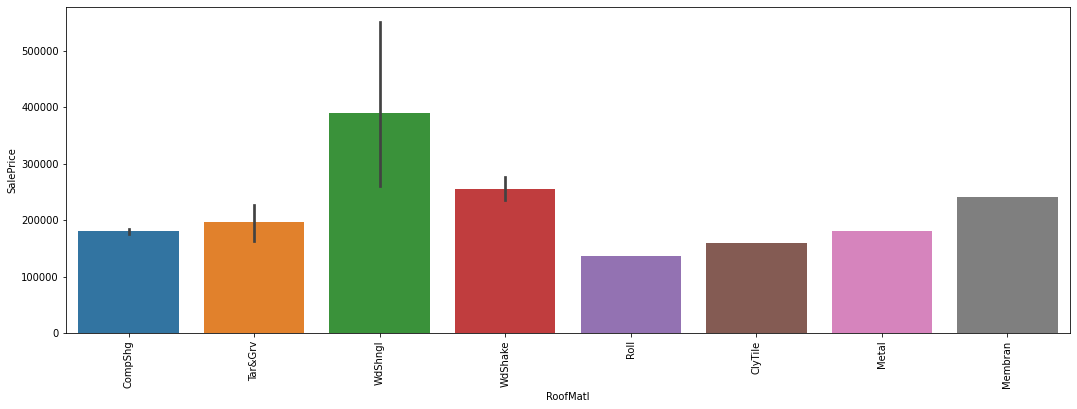

In [45]:
plt.figure(figsize=(18,6))
sns.barplot(x="RoofMatl",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

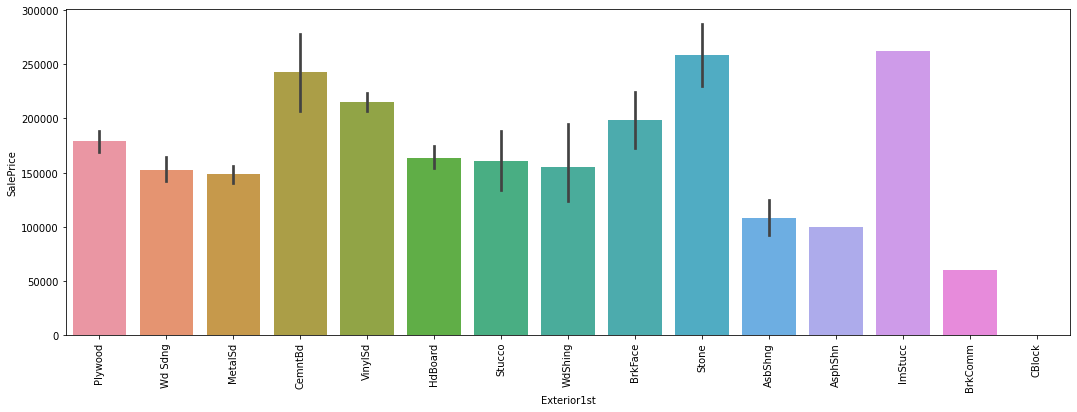

In [46]:
plt.figure(figsize=(18,6))
sns.barplot(x="Exterior1st",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

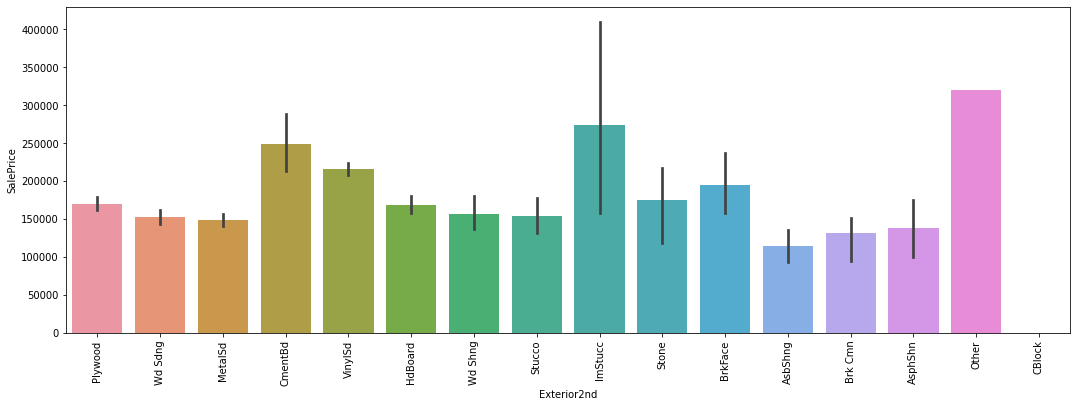

In [47]:
plt.figure(figsize=(18,6))
sns.barplot(x="Exterior2nd",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

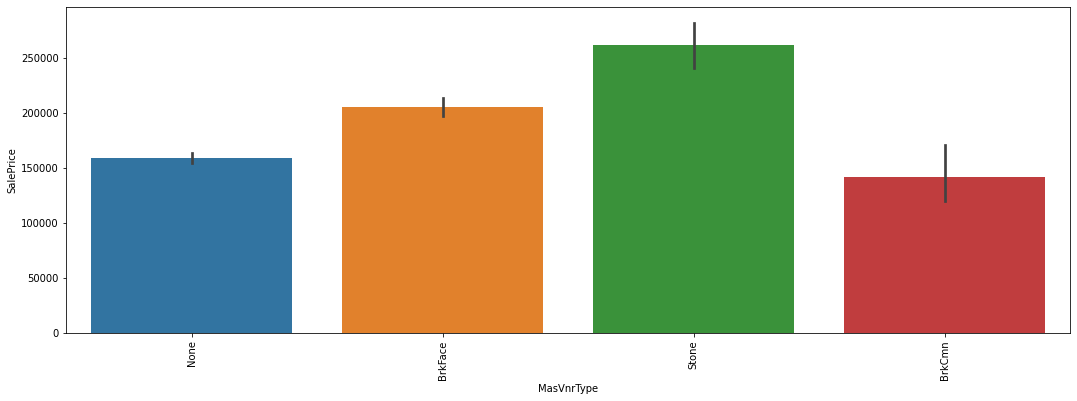

In [48]:
plt.figure(figsize=(18,6))
sns.barplot(x="MasVnrType",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

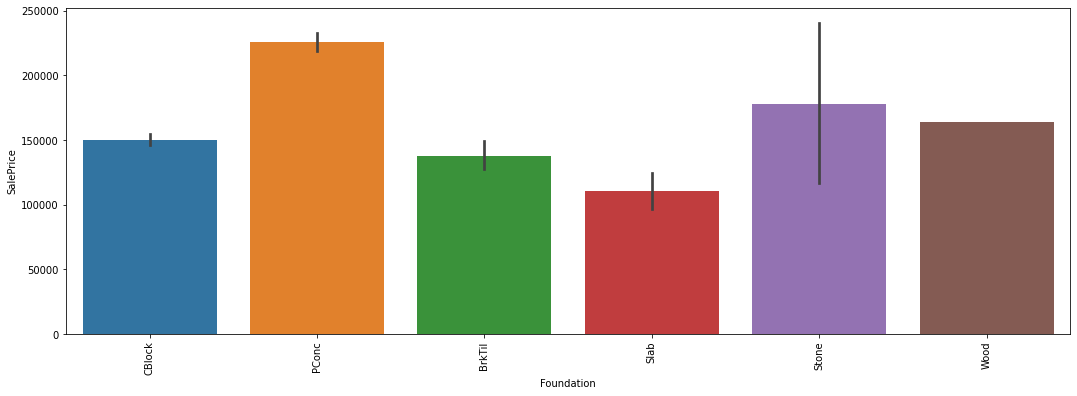

In [49]:
plt.figure(figsize=(18,6))
sns.barplot(x="Foundation",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

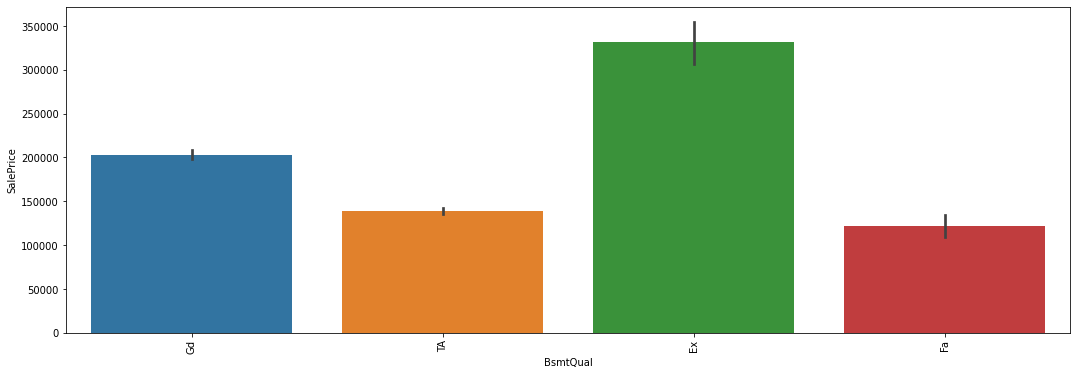

In [50]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtQual",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

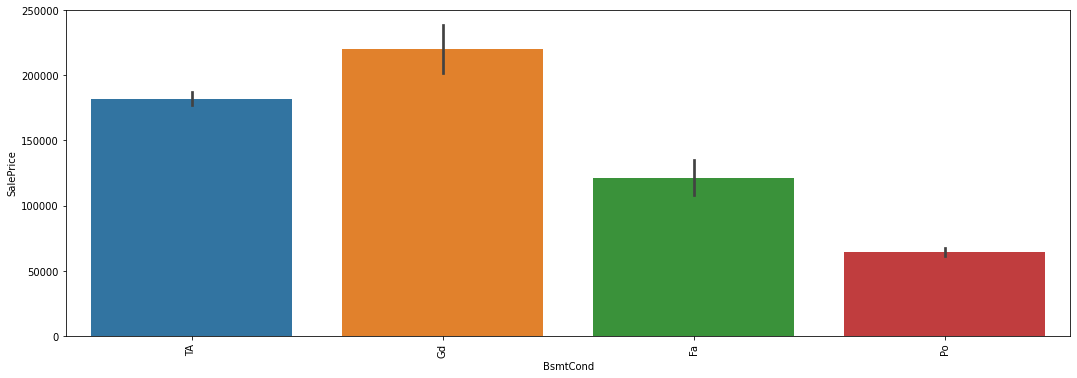

In [51]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtCond",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

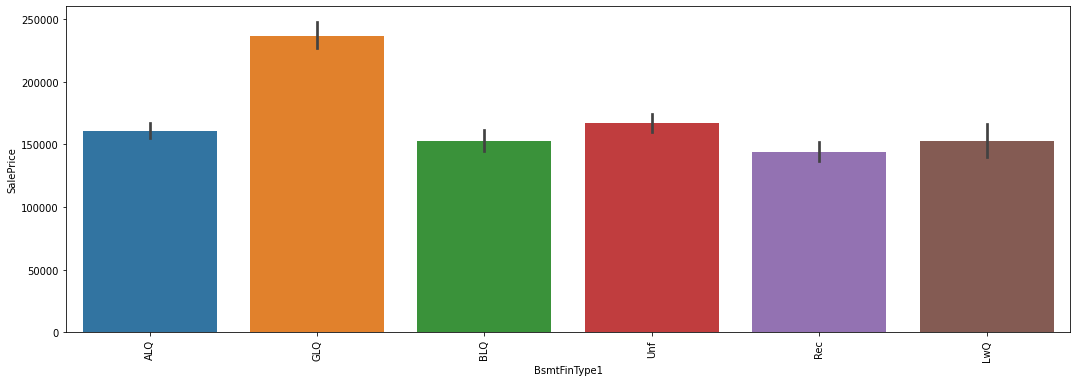

In [52]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtFinType1",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

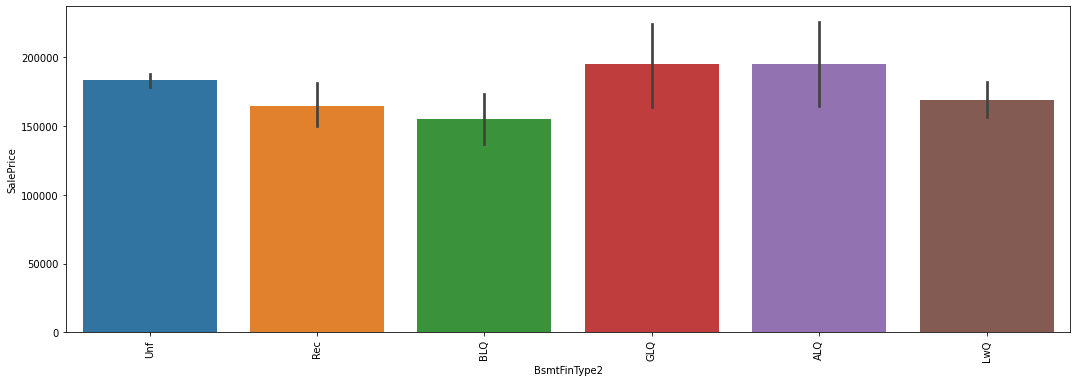

In [53]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtFinType2",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

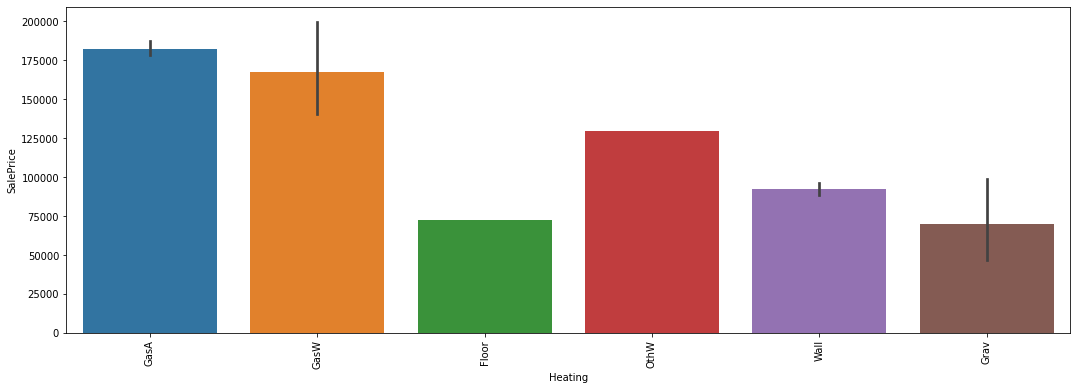

In [54]:
plt.figure(figsize=(18,6))
sns.barplot(x="Heating",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

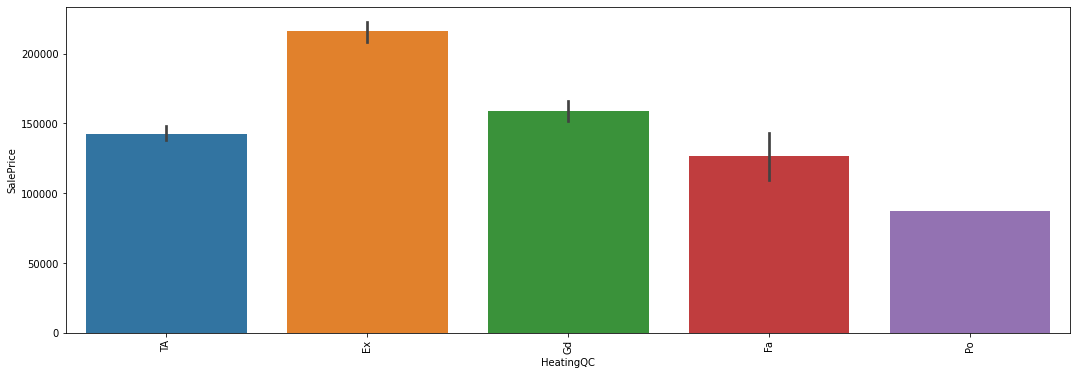

In [55]:
plt.figure(figsize=(18,6))
sns.barplot(x="HeatingQC",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

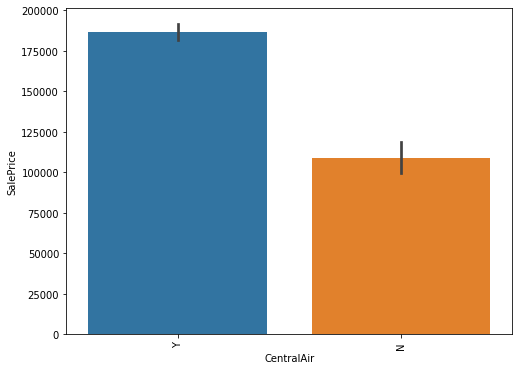

In [56]:
plt.figure(figsize=(8,6))
sns.barplot(x="CentralAir",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

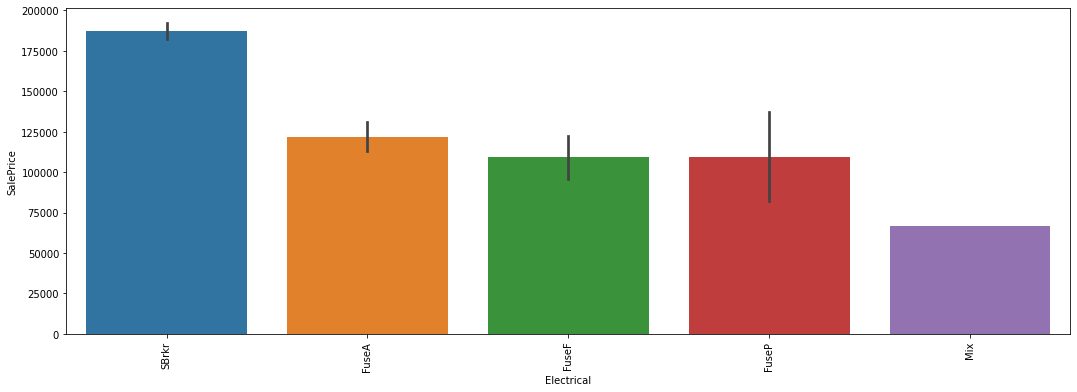

In [57]:
plt.figure(figsize=(18,6))
sns.barplot(x="Electrical",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

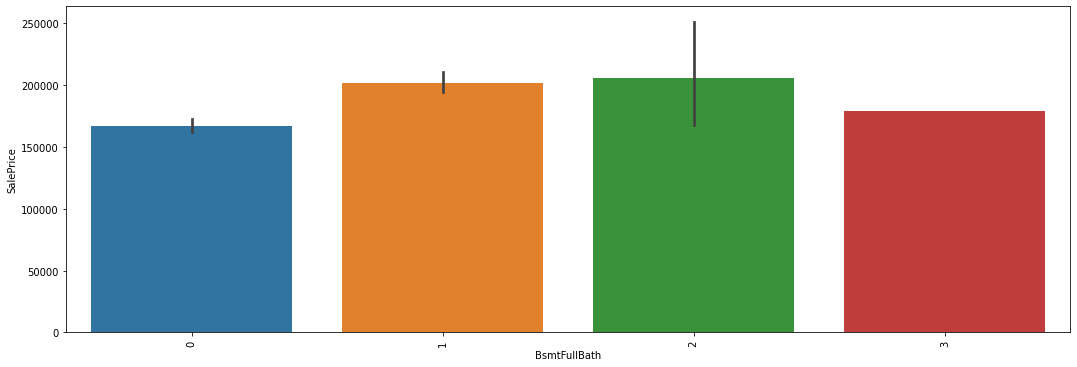

In [58]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtFullBath",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

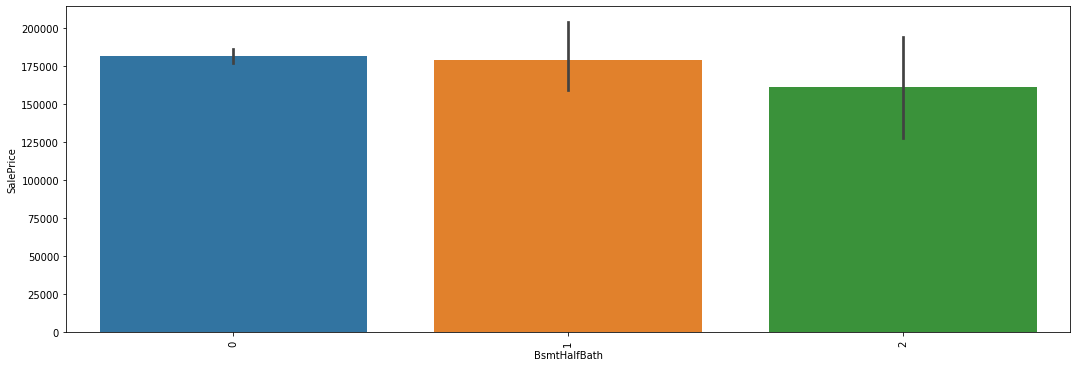

In [59]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtHalfBath",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

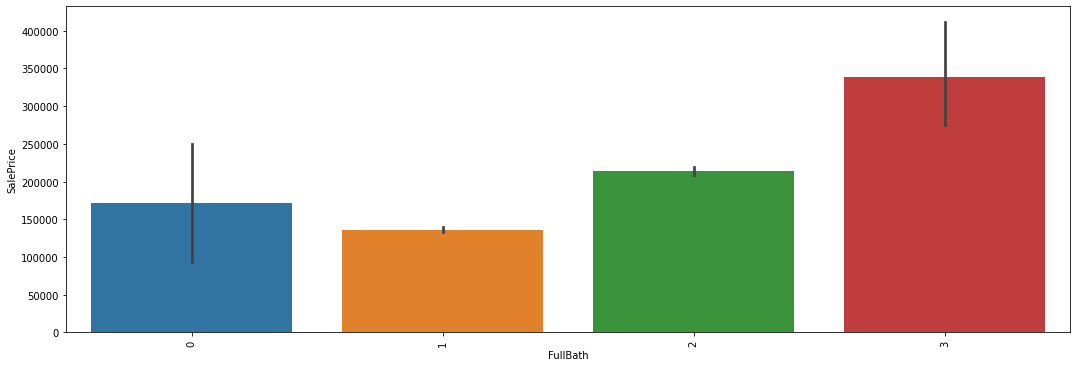

In [60]:
plt.figure(figsize=(18,6))
sns.barplot(x="FullBath",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

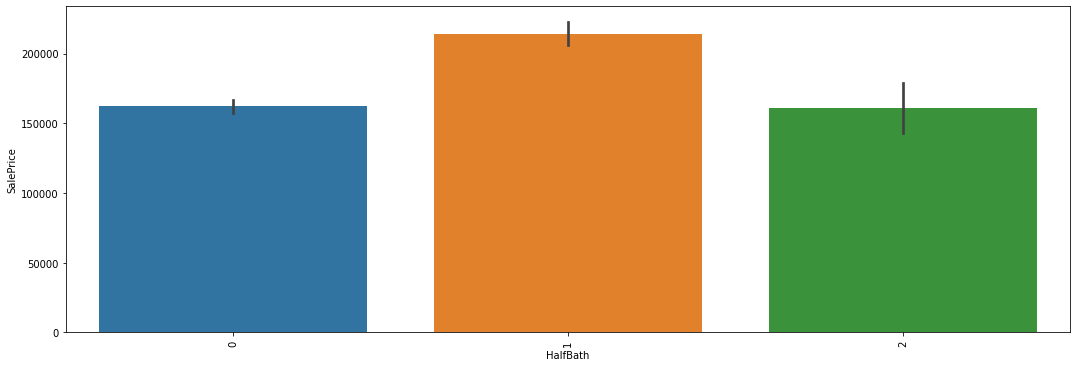

In [61]:
plt.figure(figsize=(18,6))
sns.barplot(x="HalfBath",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

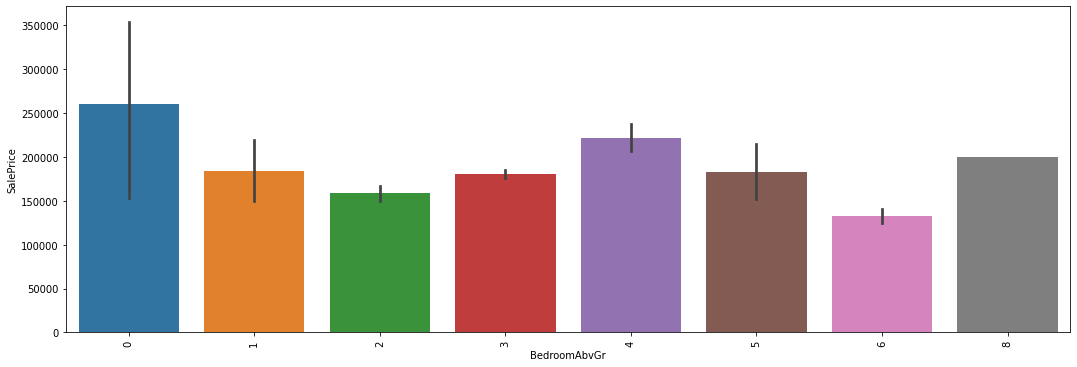

In [62]:
plt.figure(figsize=(18,6))
sns.barplot(x="BedroomAbvGr",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

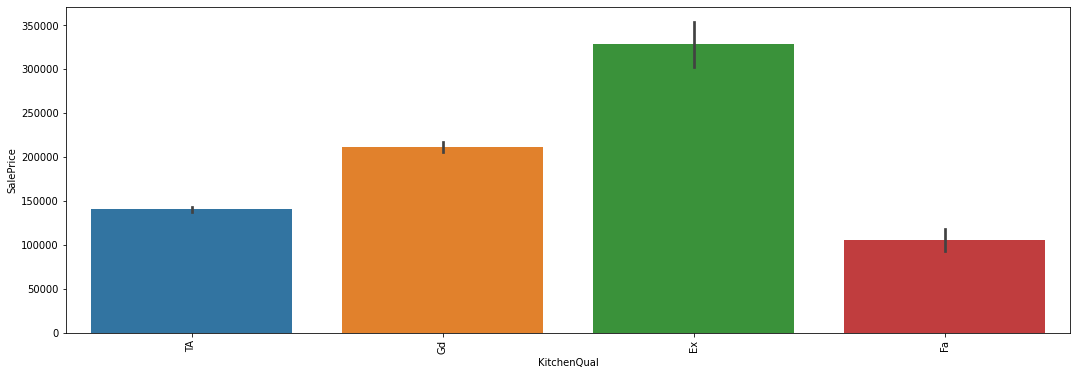

In [63]:
plt.figure(figsize=(18,6))
sns.barplot(x="KitchenQual",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

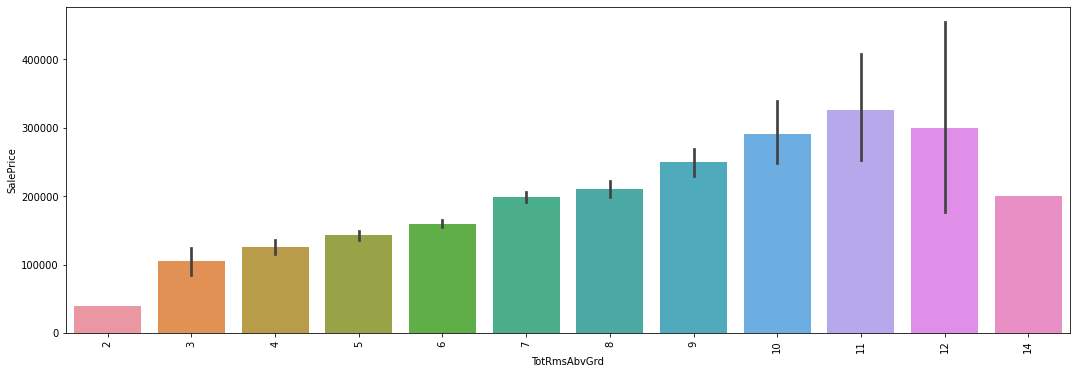

In [64]:
plt.figure(figsize=(18,6))
sns.barplot(x="TotRmsAbvGrd",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

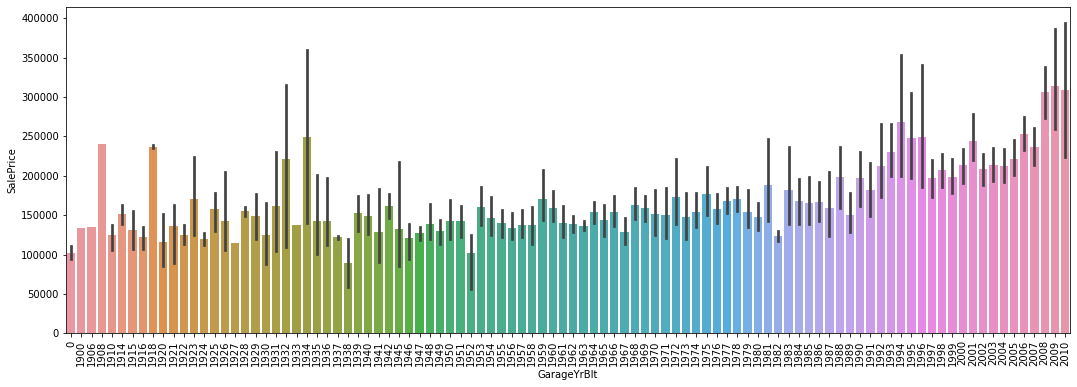

In [65]:
plt.figure(figsize=(18,6))
sns.barplot(x="GarageYrBlt",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

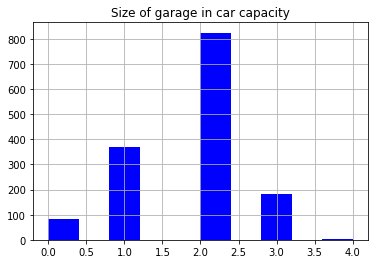

In [66]:
df_concat["GarageCars"].hist(grid=True,color='blue')
plt.title("Size of garage in car capacity")
plt.show()

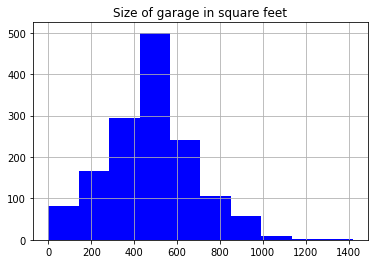

In [67]:
df_concat["GarageArea"].hist(grid=True,color='blue')
plt.title("Size of garage in square feet")
plt.show()

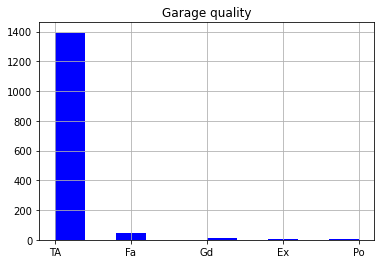

In [68]:
df_concat["GarageQual"].hist(grid=True,color='blue')
plt.title("Garage quality")
plt.show()

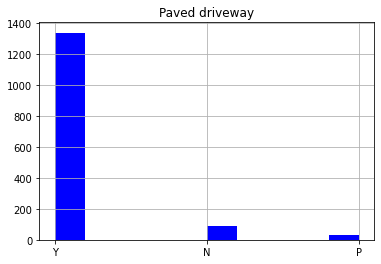

In [69]:
df_concat["PavedDrive"].hist(grid=True,color='blue')
plt.title("Paved driveway")
plt.show()

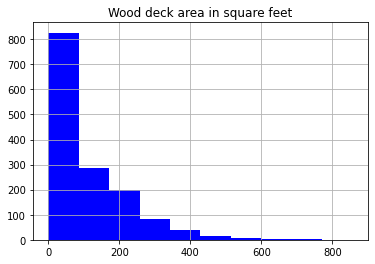

In [70]:
df_concat["WoodDeckSF"].hist(grid=True,color='blue')
plt.title("Wood deck area in square feet")
plt.show()

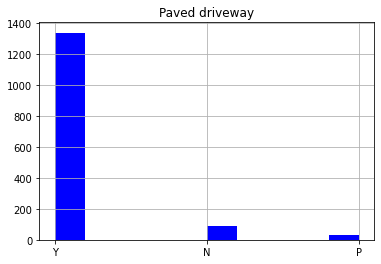

In [71]:
df_concat["PavedDrive"].hist(grid=True,color='blue')
plt.title("Paved driveway")
plt.show()

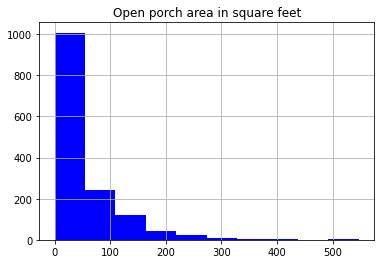

In [72]:
df_concat["OpenPorchSF"].hist(grid=True,color='blue')
plt.title("Open porch area in square feet")
plt.show()

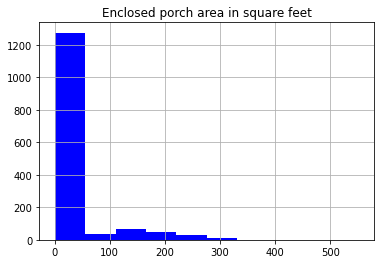

In [73]:
df_concat["EnclosedPorch"].hist(grid=True,color='blue')
plt.title("Enclosed porch area in square feet")
plt.show()

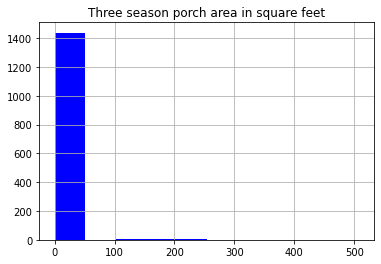

In [74]:
df_concat["3SsnPorch"].hist(grid=True,color='blue')
plt.title("Three season porch area in square feet")
plt.show()

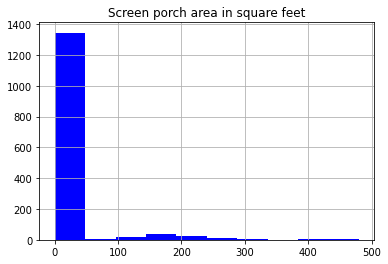

In [75]:
df_concat["ScreenPorch"].hist(grid=True,color='blue')
plt.title("Screen porch area in square feet")
plt.show()

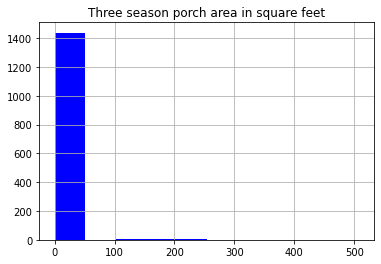

In [76]:
df_concat["3SsnPorch"].hist(grid=True,color='blue')
plt.title("Three season porch area in square feet")
plt.show()

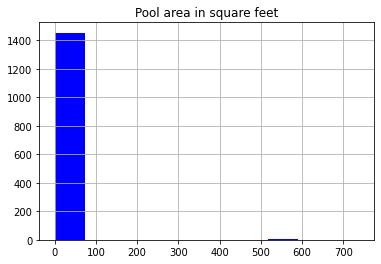

In [77]:
df_concat["PoolArea"].hist(grid=True,color='blue')
plt.title("Pool area in square feet")
plt.show()

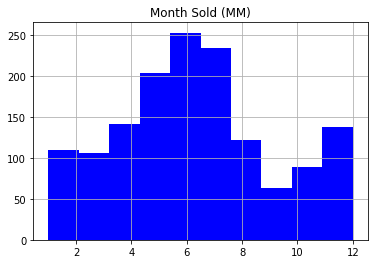

In [78]:
df_concat["MoSold"].hist(grid=True,color='blue')
plt.title("Month Sold (MM)")
plt.show()

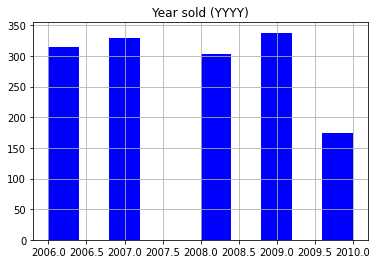

In [79]:
df_concat["YrSold"].hist(grid=True,color='blue')
plt.title("Year sold (YYYY)")
plt.show()

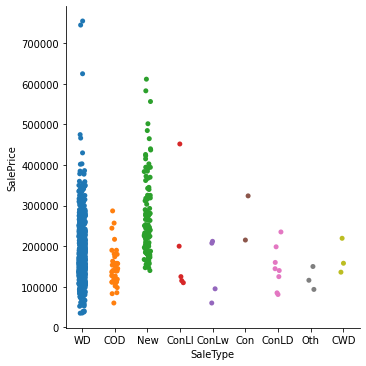

In [80]:
sns.catplot(x='SaleType',y='SalePrice',data=df_concat)

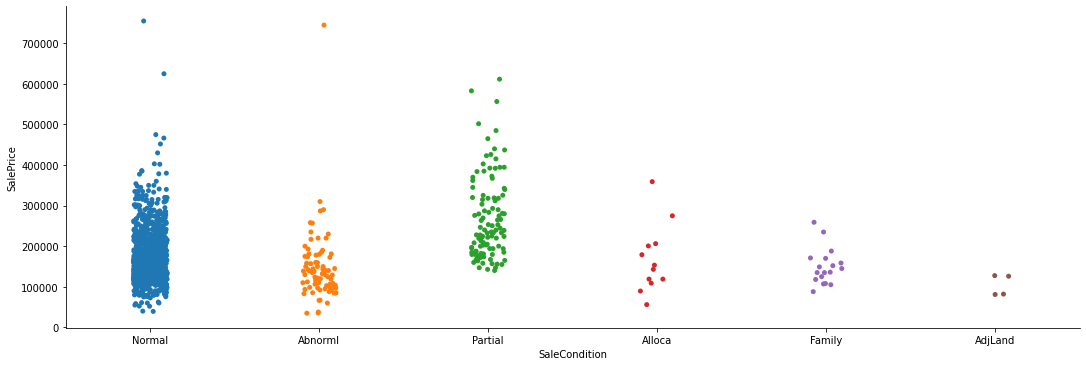

In [81]:
sns.catplot(x='SaleCondition',y='SalePrice',data = df_concat.sort_values("SalePrice", ascending = False), height = 5, aspect = 3)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

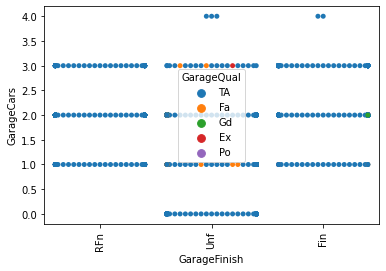

In [82]:
sns.swarmplot(x="GarageFinish", y="GarageCars",hue='GarageQual', data=df_concat)

plt.xticks(rotation=90)

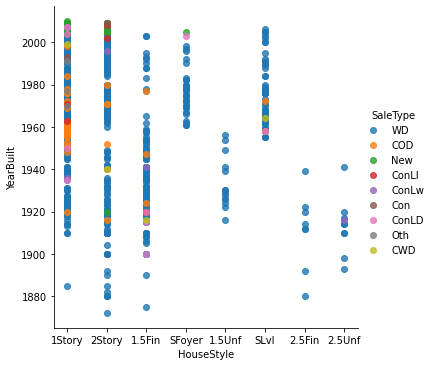

In [83]:
sns.lmplot(x ='HouseStyle', y ='YearBuilt',fit_reg = False, hue = 'SaleType',data = df_concat)

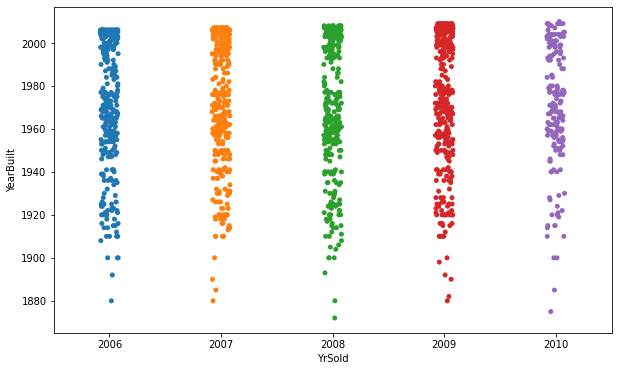

In [84]:
plt.figure(figsize=(10,6))
sns.stripplot(x="YrSold", y="YearBuilt", data=df_concat, jitter=.08)

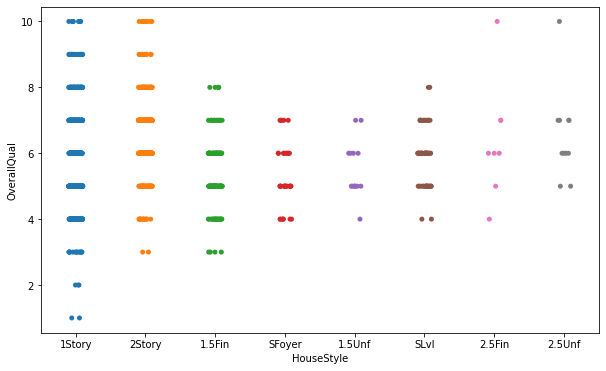

In [85]:
plt.figure(figsize=(10,6))
sns.stripplot(x="HouseStyle", y="OverallQual", data=df_concat, jitter=.1)

In [86]:
corr_mat=df_concat.corr()
corr_mat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.080997,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.060775
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.099196,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.323828
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.249499
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.789185
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.006515,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.065642
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.514408
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507831
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.132696,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.460535
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.362874
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,0.035070,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.010151


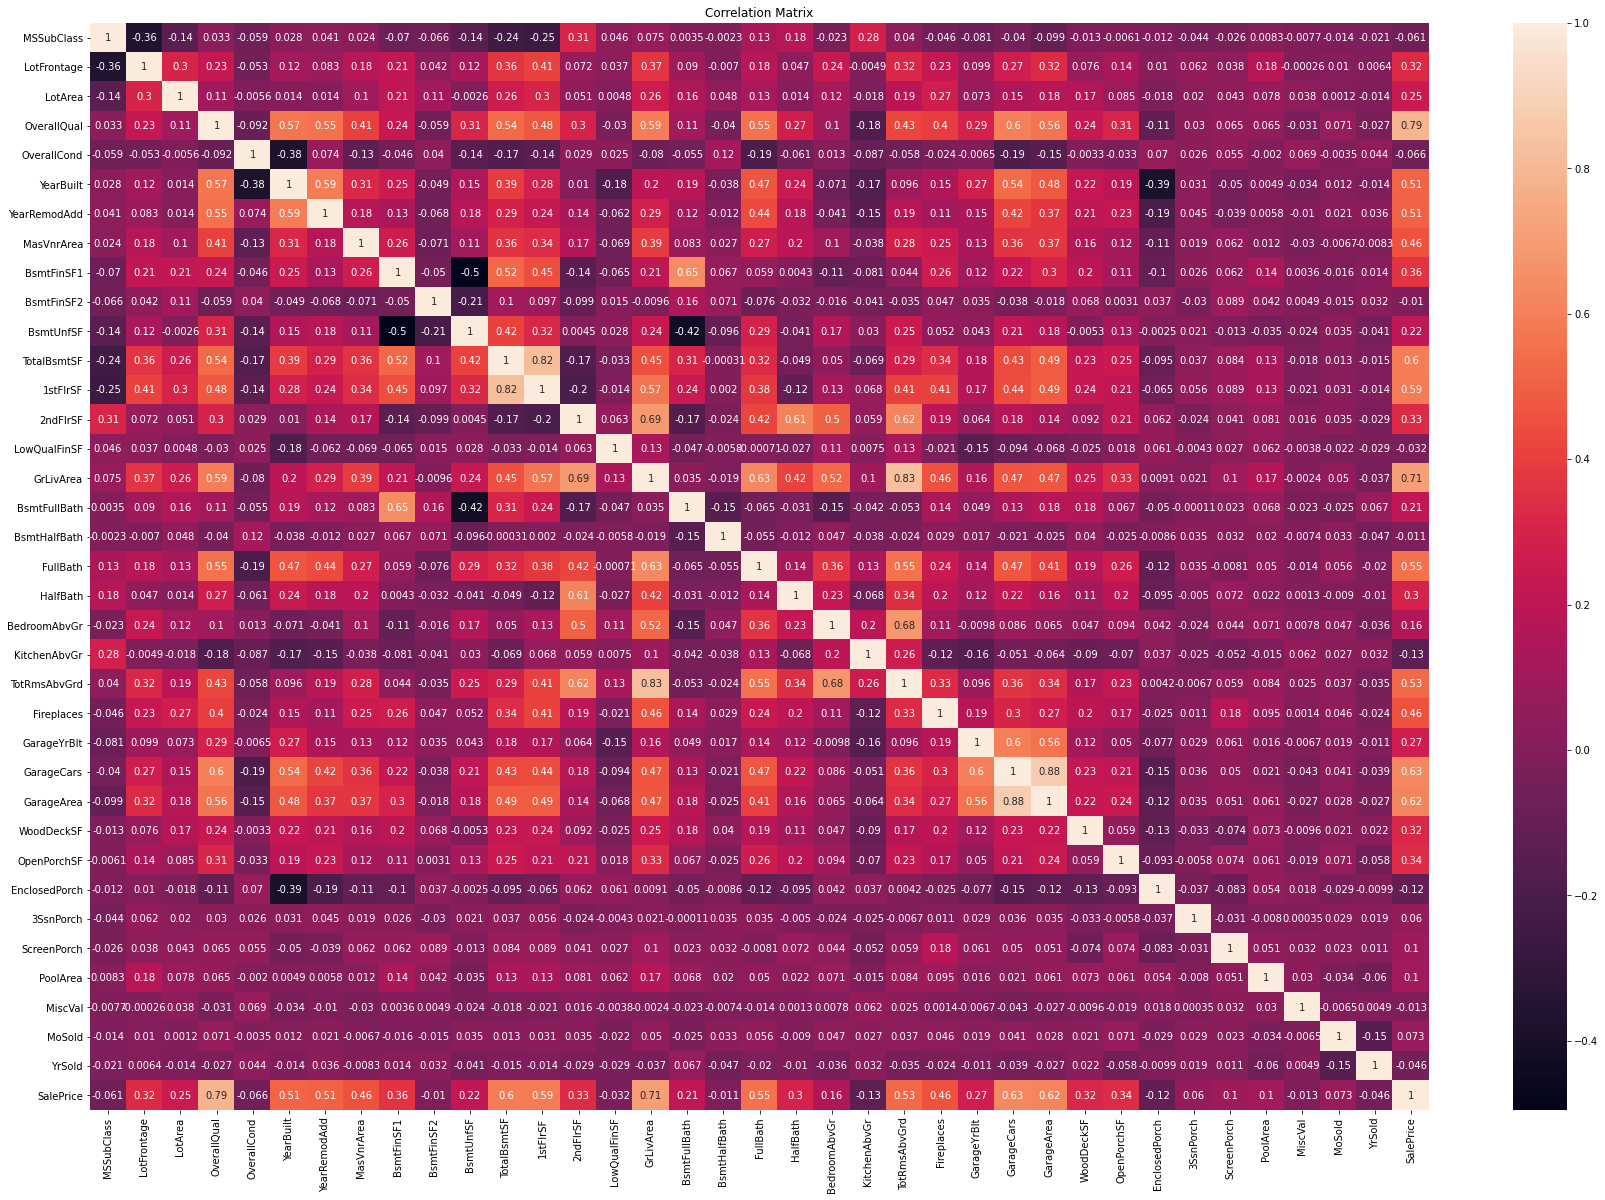

In [87]:
plt.figure(figsize=[30,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

**Observation:** We can notice that KitchenAbvGr is some what negatively correlated with SalePrice column when compared with other columns. Most of the columns are positively correlated with salesprice columns like: OverallQual,YearBlt,YearRemodelAdd,FullBath,GarageCars .

In [88]:
df_concat.select_dtypes(include=['int64','float'])
#pd.set_option('display.max_columns',None)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,69.0,4928,6,5,1976,1976,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1977,2,440,0,205,0,0,0,0,0,2,2007,128000.0
1,20,95.0,15865,8,6,1970,1970,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1970,2,621,81,207,0,0,224,0,0,10,2007,268000.0
2,60,92.0,9920,7,5,1996,1997,0.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1997,2,455,180,130,0,0,0,0,0,6,2007,269790.0
3,20,105.0,11751,6,6,1977,1977,480.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1977,2,546,0,122,0,0,0,0,0,1,2010,190000.0
4,20,69.0,16635,6,7,1977,2000,126.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1977,2,529,240,0,0,0,0,0,0,6,2009,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,78.0,10206,8,5,2007,2007,468.0,33,0,1530,1563,1563,0,0,1563,0,0,2,0,3,1,6,1,2007,3,758,144,99,0,0,0,0,0,10,2008,NaN
1456,20,57.0,9245,5,5,1994,1995,0.0,686,0,304,990,990,0,0,990,0,1,1,0,3,1,5,0,1996,2,672,0,0,0,0,0,0,0,2,2008,NaN
1457,20,69.0,11241,6,7,1970,1970,180.0,578,0,426,1004,1004,0,0,1004,1,0,1,0,2,1,5,1,1970,2,480,0,0,0,0,0,0,700,3,2010,NaN
1458,50,50.0,5000,6,7,1947,1950,0.0,399,0,605,1004,1004,660,0,1664,0,0,2,0,3,1,7,2,1950,2,420,0,24,36,0,0,0,0,10,2006,NaN


In [89]:
df_concat.select_dtypes(include=['object'])
#pd.set_option('display.max_columns',None)

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,dataset_type
0,RL,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,Train
1,RL,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,Gd,Gd,PConc,TA,Gd,Gd,ALQ,Rec,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal,Train
2,RL,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal,Train
3,RL,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,COD,Normal,Train
4,RL,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,CemntBd,CmentBd,Stone,Gd,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,Test
1456,RL,IR2,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal,Test
1457,RL,IR1,Lvl,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal,Test
1458,RM,Reg,Lvl,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,CemntBd,CmentBd,None,TA,Gd,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal,Test


**Some of the columns here we can see that they are having some kind of order and hence it is ordinal in nature**

In [90]:
df_concat['LandSlope'] = df_concat.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df_concat['ExterQual'] = df_concat.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_concat['BsmtQual'] = df_concat.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_concat['BsmtCond'] = df_concat.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_concat['BsmtExposure'] = df_concat.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df_concat['BsmtFinType1'] = df_concat.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_concat['BsmtFinType2'] = df_concat.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_concat['HeatingQC'] = df_concat.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_concat['CentralAir'] = df_concat.CentralAir.map({'N':0,'Y':1})
df_concat['KitchenQual'] = df_concat.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_concat['GarageFinish'] = df_concat.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df_concat['GarageQual'] = df_concat.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_concat['GarageCond'] = df_concat.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_concat['ExterCond'] = df_concat.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_concat['LotShape'] = df_concat.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df_concat['FireplaceQu'] = df_concat.FireplaceQu.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_concat['dataset_type'] = df_concat.dataset_type.map({'Train':0,'Test':1})

In [91]:
balance_object = df_concat.filter(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'], axis=1)
balance_object

,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Lvl,Inside,NPkVill,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Plywood,Plywood,None,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1,RL,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
2,RL,Lvl,CulDSac,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
3,RL,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Plywood,Plywood,BrkFace,CBlock,GasA,SBrkr,Typ,Attchd,Y,COD,Normal
4,RL,Lvl,FR2,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,CemntBd,CmentBd,Stone,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Lvl,Inside,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1456,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,SBrkr,Typ,Detchd,Y,WD,Normal
1457,RL,Lvl,CulDSac,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1458,RM,Lvl,Corner,BrkSide,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,CemntBd,CmentBd,None,CBlock,GasA,SBrkr,Typ,Detchd,Y,WD,Normal


**Observation:** Some of the object columns can be transformed directly in below steps as ordinal columns are transformed above already .

In [92]:
LE=LabelEncoder()
for column in balance_object:
    df_concat.loc[:,column] = LE.fit_transform(df_concat.loc[:,column])
df_concat

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,120,3,69.0,4928,0,3,4,0,13,2,2,4,2,6,5,1976,1976,1,1,9,10,2,0.0,2,2,1,4,3,1,5,120,1,0,958,1078,1,2,1,4,958,0,0,958,0,0,2,0,2,1,2,5,6,1,2,1,1977,2,2,440,3,3,2,0,205,0,0,0,0,0,2,2007,8,4,128000.0,0
1,20,3,95.0,15865,0,3,4,1,12,2,2,0,2,8,6,1970,1970,0,5,13,14,2,0.0,3,3,2,3,4,4,5,351,3,823,1043,2217,1,4,1,4,2217,0,0,2217,1,0,2,0,4,1,3,8,6,1,2,1,1970,1,2,621,3,3,2,81,207,0,0,224,0,0,10,2007,8,4,268000.0,0
2,60,3,92.0,9920,0,3,1,0,15,2,2,0,5,7,5,1996,1997,1,1,8,8,2,0.0,3,2,2,4,3,3,6,862,1,0,255,1117,1,4,1,4,1127,886,0,2013,1,0,2,1,3,1,2,8,6,1,2,1,1997,1,2,455,3,3,2,180,130,0,0,0,0,0,6,2007,8,4,269790.0,0
3,20,3,105.0,11751,0,3,4,0,14,2,2,0,2,6,6,1977,1977,3,1,9,10,1,480.0,2,2,1,4,3,1,4,705,1,0,1139,1844,1,4,1,4,1844,0,0,1844,0,0,2,0,3,1,2,7,6,1,2,1,1977,2,2,546,3,3,2,0,122,0,0,0,0,0,1,2010,0,4,190000.0,0
4,20,3,69.0,16635,0,3,2,0,14,2,2,0,2,6,7,1977,2000,1,1,5,5,3,126.0,3,2,1,4,3,1,5,1246,1,0,356,1602,1,3,1,4,1602,0,0,1602,0,1,2,0,3,1,3,8,6,1,2,1,1977,3,2,529,3,3,2,240,0,0,0,0,0,0,6,2009,8,4,215000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,3,78.0,10206,3,3,4,0,21,2,2,0,2,8,5,2007,2007,1,1,12,13,3,468.0,2,2,2,4,3,1,6,33,1,0,1530,1563,1,4,1,4,1563,0,0,1563,0,0,2,0,3,1,3,6,6,1,3,1,2007,2,3,758,3,3,2,144,99,0,0,0,0,0,10,2008,8,4,NaN,1
1456,20,3,57.0,9245,1,3,4,0,5,2,2,0,2,5,5,1994,1995,1,1,12,13,2,0.0,2,2,2,4,3,1,6,686,1,0,304,990,1,4,1,4,990,0,0,990,0,1,1,0,3,1,2,5,6,0,3,5,1996,1,2,672,3,3,2,0,0,0,0,0,0,0,2,2008,8,4,NaN,1
1457,20,3,69.0,11241,0,3,1,0,12,2,2,0,2,6,7,1970,1970,1,1,13,14,1,180.0,2,2,1,3,3,1,5,578,1,0,426,1004,1,4,1,4,1004,0,0,1004,1,0,1,0,2,1,2,5,6,1,2,1,1970,3,2,480,3,3,2,0,0,0,0,0,0,700,3,2010,8,4,NaN,1
1458,50,4,50.0,5000,3,3,0,0,3,1,2,0,0,6,7,1947,1950,1,1,5,5,2,0.0,2,3,1,3,3,1,5,399,1,0,605,1004,1,4,1,4,1004,660,0,1664,0,0,2,0,3,1,2,7,6,2,3,5,1950,1,2,420,3,3,2,0,24,36,0,0,0,0,10,2006,8,4,NaN,1


# **Binning:**

In [93]:
#Binning:
bins = [1860,1875,1890,1905,1920,1935,1950,1965,1980,1995,2010]
labels = [i for i in range(10)]
df_concat['YearBuilt'] = pd.cut(df_concat['YearBuilt'], bins=bins, labels=labels, include_lowest=True)

In [94]:
df_concat['YearBuilt'] = df_concat['YearBuilt'].astype(int)

In [95]:
#Binning:
bins = [0,1875,1890,1905,1920,1935,1950,1965,1980,1995,2010]
labels = [i for i in range(10)]
df_concat['GarageYrBlt'] = pd.cut(df_concat['GarageYrBlt'], bins=bins, labels=labels, include_lowest=True)

In [96]:
df_concat['GarageYrBlt']= df_concat['GarageYrBlt'].astype(int)

In [97]:
#Binning:
bins = [0,2006,2007,2008,2009,2010]
labels = [i for i in range(5)]
df_concat['YrSold'] = pd.cut(df_concat['YrSold'], bins=bins, labels=labels, include_lowest=True)

In [98]:
df_concat['YrSold']= df_concat['YrSold'].astype(int)

**Observation:** Binning has been done for some of the Year columns so as to get good fit for model building and reduce the count and ranges .

# **Lets Check Outliers with Box Plot:**

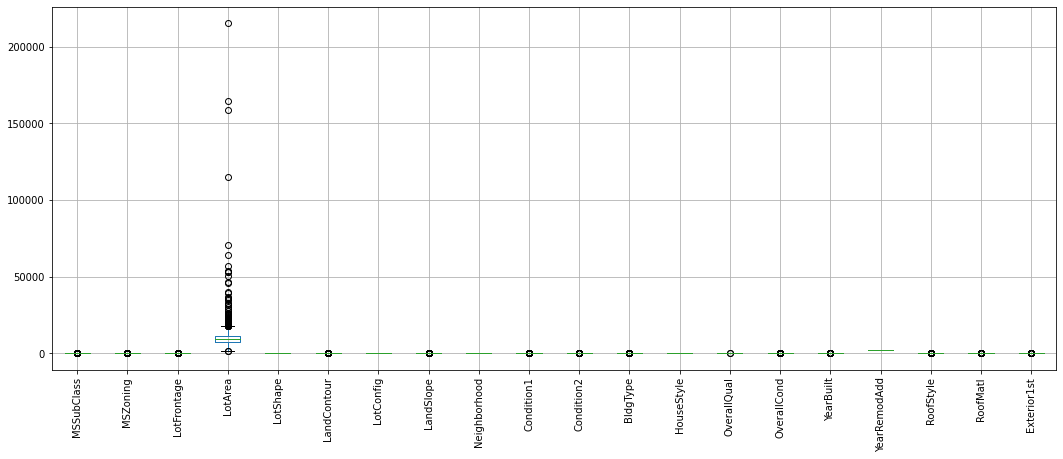

In [99]:
df_concat.iloc[:,0:20].boxplot(figsize=[18,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

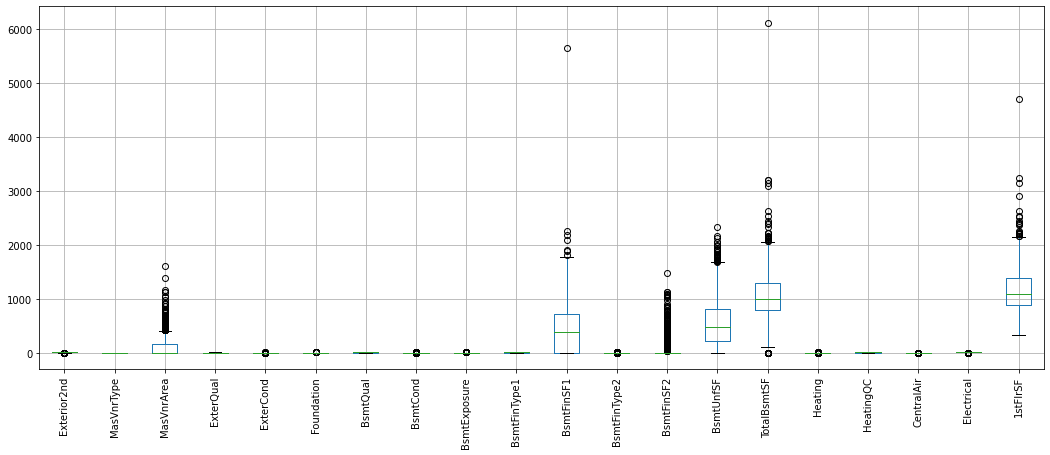

In [100]:
df_concat.iloc[:,20:40].boxplot(figsize=[18,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

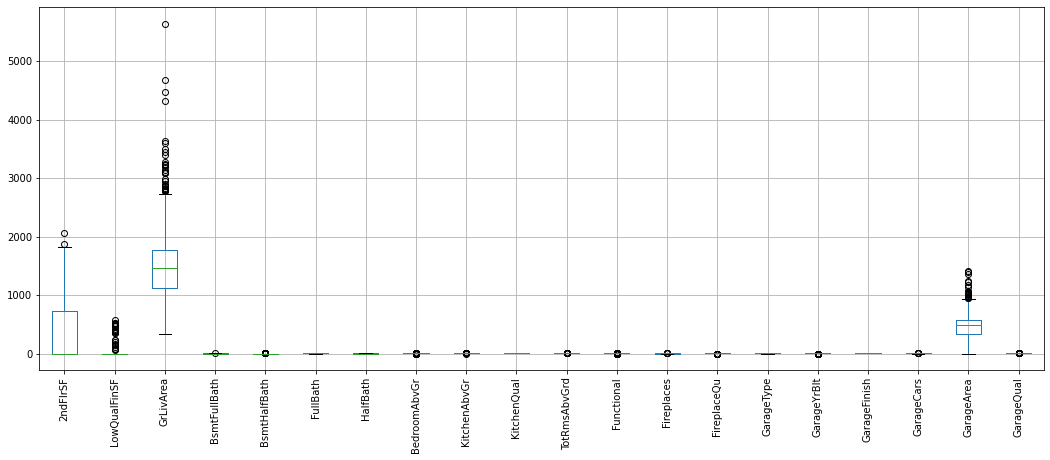

In [101]:
df_concat.iloc[:,40:60].boxplot(figsize=[18,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

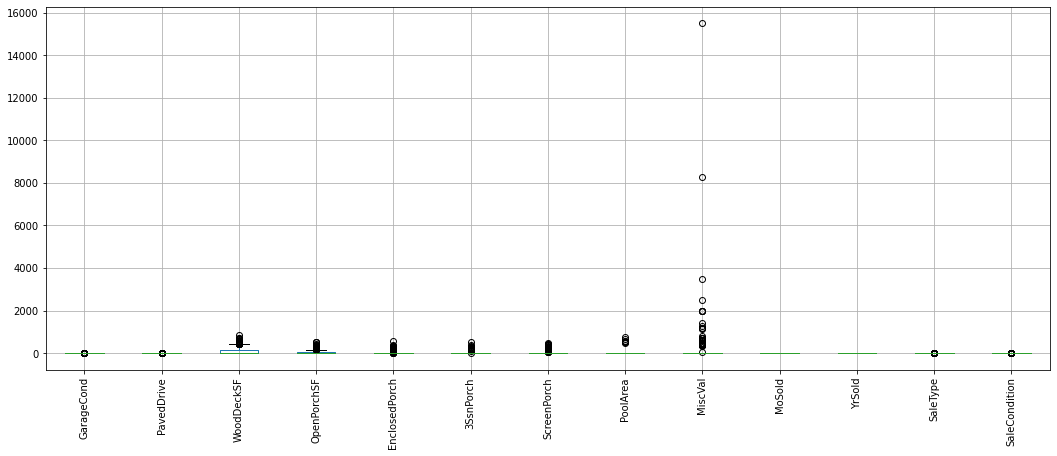

In [102]:
df_concat.iloc[:,60:73].boxplot(figsize=[18,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

**Observation:** We can notice that there are some columns having outliers like MiscVal,GrLiveArea,LowQualityFinSF,GarageArea,TotalBsmtSF,LotArea,MasVsrArea,1stFlrSF.

# **Outlier Removal:**

In [103]:
from scipy.stats import zscore
z=np.abs(zscore(df_concat))
df_zscore=df_concat[(z<3).all(axis=1)]

In [104]:
df_zscore.shape

(0, 75)

**Observation:** When tried to remove outlier data is skewed. so lets proceed with the outliers.

In [105]:
df_concat.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000,1460.000000
mean,56.897260,3.028767,69.863699,10516.828082,1.942466,2.777397,3.019178,0.062329,12.251370,2.031507,2.008219,0.493151,3.038356,6.099315,5.575342,6.842466,1984.865753,1.410274,1.075342,9.624658,10.339726,1.762329,103.117123,2.39589,2.083562,1.396575,3.565068,3.010959,1.656164,3.571233,443.639726,1.273288,46.549315,567.240411,1057.429452,1.036301,3.145205,0.934932,3.682192,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,2.511644,6.517808,5.749315,0.613014,2.715753,2.208219,6.917808,1.771233,1.767123,472.980137,2.976712,2.975342,1.856164,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,1.815753,7.513014,3.770548,181477.005993,0.200000
std,42.300571,0.632017,22.027677,9981.264932,1.409156,0.707666,1.622634,0.276232,6.013735,0.868515,0.259040,1.198277,1.911305,1.382997,1.112799,2.002700,20.645407,0.834998,0.599127,3.197659,3.540570,0.614274,180.731373,0.57428,0.351054,0.722394,0.678071,0.284178,1.039123,2.070649,456.098091,0.869859,161.319273,441.866955,438.705324,0.295124,0.959501,0.246731,1.051301,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.663760,1.625393,0.979659,0.644666,0.603302,1.759864,2.313079,0.811835,0.747315,213.804841,0.241665,0.232860,0.496592,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79105.586863,0.400137
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,20.000000,3.000000,60.000000,7553.500000,0.000000,3.000000,2.000000,0.000000,7.000000,2.000000,2.000000,0.000000,2.000000,5.000000,5.000000,6.0

In [106]:
#Lets seprate the train and test
df_newtrain=df_concat.loc[df_concat["dataset_type"]==0]
df_newtest=df_concat.loc[df_concat["dataset_type"]==1]

**Observation:** Splitting of the dataset with TEST and TRAIN datas after data handlings in above steps .

In [107]:
#Lets drop the SalePrice from test dataset as that is the o/p variable that needs to be predicted
df_newtest.drop(columns=["SalePrice"],inplace=True)

In [108]:
#lets drop "dataset_type" column from df_newtrain and df_newtest
df_newtrain.drop(columns=["dataset_type"],inplace=True)
df_newtest.drop(columns=["dataset_type"],inplace=True)

# **Feature Selection:**

In [109]:
#seprating input and output from df_newtrain
x=df_newtrain.drop(columns=["SalePrice"])
y=df_newtrain[["SalePrice"]]

# **Splitting of Independent and dependent variables.**

Observation: In the above block of codes we have split the datset which was earlier concatinated in start. Now we need to do x,y split so we have done train and test datset split and x,y split for model process

# **Skewness removal and Standardisation:**

In [ ]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [ ]:
x = df_skew

In [111]:
x.shape

(1168, 73)

In [112]:
y.shape

(1168, 1)

# **Best Random State Checking:**

In [113]:
maximum_accuracy=0
maximum_randomstate=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
 #  acc=accuracy_score(y_test,pred)
    acc=(r2_score(y_test,pred))
    if acc>maximum_accuracy:
        maximum_accuracy=acc
        maximum_randomstate=i
print("Best accuracy is  "  ,maximum_accuracy , "  at random_state:", maximum_randomstate)

Best accuracy is   0.8791700462023353   at random_state: 135


In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=maximum_randomstate)

# **Model Building:**

In [115]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Coefficient : ",lm.coef_)
print("Intercept   : ",lm.intercept_)
print("Score       : ",lm.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[-1.36801740e+02 -2.81052903e+02 -1.63295048e+02  4.03901812e-03
  -6.46655246e+02  3.92366716e+03 -1.90127476e+02  5.90798069e+03
   5.29455479e+02 -2.11232106e+02 -1.64468202e+04 -2.61479437e+03
  -1.67403065e+03  1.16665893e+04  3.55832355e+03  1.65221217e+03
   1.67204772e+01  2.59458288e+03  5.10501967e+03 -3.83391941e+02
  -2.28455762e+02  4.17968919e+03  2.62927906e+01  1.04403421e+04
  -6.91571824e+03  1.26492853e+03  1.19081227e+04  9.01436406e+02
   4.80083325e+03  2.77965385e+03  1.98059275e-01 -1.48804588e+03
   1.92013174e+00 -1.87289106e+00  2.45299937e-01 -5.99446878e+02
   2.11471680e+03  1.92833992e+02 -1.20780749e+03  2.40515108e+01
   1.87470576e+01 -2.30251441e+01  1.97734242e+01  6.44159184e+03
   3.01871908e+02  5.87943997e+03  2.40643147e+03 -2.55682524e+03
  -1.23341436e+04  8.91757328e+03  3.65659540e+03  3.04529070e+03
   8.32440224e+03  4.84380733e+03  6.13181821e+02 -3.54196387e+03
   2.72341559e+03  1.18547515e+04  1.80695997e+01  7.44161982

In [117]:
ls=Lasso(alpha=0.0001) 
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print("Coefficient : ",ls.coef_)
print("Intercept   : ",ls.intercept_)
print("Score       : ",ls.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
    #r2 score ------> coefficient of determination
    #i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [-1.36801756e+02 -2.81052723e+02 -1.63295051e+02  4.03904025e-03
 -6.46655254e+02  3.92366669e+03 -1.90127353e+02  5.90797910e+03
  5.29455466e+02 -2.11231907e+02 -1.64468177e+04 -2.61479388e+03
 -1.67403044e+03  1.16665897e+04  3.55832345e+03  1.65221224e+03
  1.67204873e+01  2.59458267e+03  5.10501955e+03 -3.83391864e+02
 -2.28455787e+02  4.17968906e+03  2.62927905e+01  1.04403416e+04
 -6.91571690e+03  1.26492804e+03  1.19081228e+04  9.01435400e+02
  4.80083324e+03  2.77965388e+03  1.10226224e+00 -1.48804528e+03
  2.82433211e+00 -9.68688999e-01 -6.58902413e-01 -5.99445414e+02
  2.11471701e+03  1.92832585e+02 -1.20780710e+03  3.89306808e+01
  3.36262286e+01 -8.14597144e+00  4.89425527e+00  6.44159045e+03
  3.01869303e+02  5.87943788e+03  2.40643022e+03 -2.55682463e+03
 -1.23341399e+04  8.91757326e+03  3.65659485e+03  3.04529064e+03
  8.32440220e+03  4.84380694e+03  6.13181532e+02 -3.54196346e+03
  2.72341547e+03  1.18547502e+04  1.80696022e+01  7.44161835e+03
  1.882080

In [118]:
rd=Ridge(alpha=0.0001)# to minimize the coefficient varience
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
rd.score(x_train,y_train)
print("Coefficient : ",rd.coef_)
print("Intercept   : ",rd.intercept_)
print("Score       : ",rd.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[-1.36801790e+02 -2.81053268e+02 -1.63295092e+02  4.03910159e-03
  -6.46655750e+02  3.92366504e+03 -1.90127023e+02  5.90797128e+03
   5.29455306e+02 -2.11230674e+02 -1.64467790e+04 -2.61479478e+03
  -1.67402980e+03  1.16665929e+04  3.55832237e+03  1.65221231e+03
   1.67205762e+01  2.59458193e+03  5.10501883e+03 -3.83391526e+02
  -2.28455945e+02  4.17968913e+03  2.62927919e+01  1.04403348e+04
  -6.91570896e+03  1.26492784e+03  1.19081195e+04  9.01436473e+02
   4.80083309e+03  2.77965440e+03  1.92105645e-01 -1.48804514e+03
   1.91417477e+00 -1.87884701e+00  2.51255301e-01 -5.99442377e+02
   2.11471882e+03  1.92838070e+02 -1.20780653e+03  2.40359019e+01
   1.87314577e+01 -2.30407364e+01  1.97890385e+01  6.44158459e+03
   3.01868145e+02  5.87942769e+03  2.40642434e+03 -2.55682448e+03
  -1.23340978e+04  8.91757272e+03  3.65659124e+03  3.04528985e+03
   8.32440217e+03  4.84380523e+03  6.13180531e+02 -3.54196169e+03
   2.72341773e+03  1.18547389e+04  1.80696272e+01  7.44159237

In [119]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rf.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",rf.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9727314212416207
 
error
Mean absolute error    : 17659.88076923077
Mean squared error     : 668016621.8480958
Root mean squared error: 25846.01752394546
 
r2 score :  0.9122683127675696


In [120]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
gbr.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",gbr.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9686158114709632
 
error
Mean absolute error    : 16164.799759146797
Mean squared error     : 566031198.6935185
Root mean squared error: 23791.410187156172
 
r2 score :  0.9256622208737949


In [121]:
adb=AdaBoostRegressor()
adb.fit(x_train,y_train)
pred=adb.predict(x_test)
adb.score(x_train,y_train)
print("Score       : ",adb.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.8604252880358004
 
error
Mean absolute error    : 26801.55523189741
Mean squared error     : 1350068683.3247926
Root mean squared error: 36743.280791524216
 
r2 score :  0.8226933288874307


# **Prediction:**

In [122]:
#Pridict the value
pred=lm.predict(x_test)
print("Predicted Price : ", pred )
print("Actual Price :", y_test)

Predicted Price :  [[152602.01152782]
 [123547.4989912 ]
 [170153.31863666]
 [246540.85215904]
 [ 86735.75332972]
 [263377.61512496]
 [194960.7484034 ]
 [108225.95534459]
 [104827.16163624]
 [126047.57733072]
 [ 64700.62136138]
 [150629.39280239]
 [242188.03891565]
 [170202.99287177]
 [130865.49734201]
 [172724.99465216]
 [197133.55081033]
 [193367.49524382]
 [308305.20635707]
 [210405.50638061]
 [151335.93792961]
 [152413.50661609]
 [130548.94200014]
 [298735.80888491]
 [ 74644.18156259]
 [158621.94244237]
 [244403.91490985]
 [239897.31923702]
 [ 73539.18119629]
 [182027.05909653]
 [161689.7796169 ]
 [112692.00389701]
 [187171.95847796]
 [119215.69000522]
 [118125.86316859]
 [161051.82775999]
 [327952.95695175]
 [101990.21714357]
 [103851.94482526]
 [150001.11841915]
 [286896.25690541]
 [196464.46072882]
 [386524.56211892]
 [ -6265.82053582]
 [ 85467.7506291 ]
 [256309.82773887]
 [139027.99929871]
 [377408.35789909]
 [237462.94475726]
 [122676.68020653]
 [166893.02013079]
 [ 66012.099

# **Cross Validation checking:**

In [123]:
scr=cross_val_score(lm,x,y,cv=5,scoring="r2")
print("Cross Validation Score of LinearRegression Model is : ", scr.mean())

Cross Validation Score of LinearRegression Model is :  0.7456540038369008


In [124]:
scr=cross_val_score(ls,x,y,cv=5,scoring="r2")
print("Cross Validation Score of Lasso Model is : ", scr.mean())

Cross Validation Score of Lasso Model is :  0.7456540081603062


In [125]:
scr=cross_val_score(rd,x,y,cv=5,scoring="r2")
print("Cross Validation Score of RidgeRegression Model is : ", scr.mean())

Cross Validation Score of RidgeRegression Model is :  0.7456540740409634


In [126]:
scr=cross_val_score(rf,x,y,cv=5,scoring="r2")
print("Cross Validation Score of RandomForestRegressor Model is : ", scr.mean())

Cross Validation Score of RandomForestRegressor Model is :  0.8505164762142641


In [127]:
scr=cross_val_score(gbr,x,y,cv=5,scoring='r2')
print("Cross Validation Score of GradientBoostingRegressor Model is : ", scr.mean())

Cross Validation Score of GradientBoostingRegressor Model is :  0.8673584150896556


In [128]:
scr=cross_val_score(adb,x,y,cv=5,scoring="r2")
print("Cross Validation Score of AdaBoostRegressor Model is : ", scr.mean())

Cross Validation Score of AdaBoostRegressor Model is :  0.8055076370631182


**Observation:**

Above various models shows that RandomForest and GradiantBooster Regressor are the best with good scores and R2 score values. So lets proceed with these 2 models for Hyper parameter tuning

# **Hyper Parameter tuning:**
**1st Tuning:**

Random Forest Regressor

In [129]:
parameters={"bootstrap":[True,False], "criterion":["mse", "mae"],}

In [130]:
gcv=GridSearchCV(RandomForestRegressor(), parameters,cv=5,scoring='r2') #Tuning

In [131]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [132]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
mod=RandomForestRegressor(bootstrap= True, criterion='mae',random_state=maximum_randomstate)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

# **2nd Tuning:**
GradientBoosting Regressor

In [133]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500]}

In [134]:
gcv=GridSearchCV(GradientBoostingRegressor(), parameters,cv=5,scoring="r2") #Tuning

In [135]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...=None,
                      

In [136]:
gcv.best_params_

{'learning_rate': 0.01, 'n_estimators': 500, 'subsample': 0.1}

In [137]:
mod2=GradientBoostingRegressor(learning_rate=0.04,n_estimators=100,subsample= 0.1,random_state=maximum_randomstate)
mod2.fit(x_train,y_train)
pred=mod2.predict(x_test)
print(r2_score(y_test,pred)*100)

88.66659216170999


# **3rd Tuning:**
Linear Regressor

In [138]:
#Linear Regression:
parameters={"fit_intercept":(True,False), "normalize":(False,True), "copy_X":(True,False)}

In [139]:
gcv=GridSearchCV(LinearRegression(), parameters,cv=5,scoring="r2") #Tuning

In [140]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': (True, False),
                         'fit_intercept': (True, False),
                         'normalize': (False, True)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [141]:
gcv.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [142]:
mod3=LinearRegression(copy_X=True,fit_intercept=True,normalize=True)
mod3.fit(x_train,y_train)
pred=mod3.predict(x_test)
print(r2_score(y_test,pred)*100)

87.91554163380091


# **Saving The Model:**

In [143]:
import joblib
joblib.dump(mod2,"House_Sales_price.pkl")

['House_Sales_price.pkl']

In [144]:
model=joblib.load("House_Sales_price.pkl")

In [145]:
prediction=model.predict(x_test)

In [146]:
print(r2_score(y_test,prediction)*100)

88.66659216170999


In [147]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [148]:
prediction.to_csv('House_Sales_price.csv') #Saving the predictions

In [149]:
prediction

,0
0,138692.076627
1,153988.859757
2,157314.922280
3,256250.340078
4,115207.729872
...,...
229,137839.457967
230,319295.373432
231,225698.493191
232,117916.994231


# **Testing with the 2nd Dataset (Housing price_test)**

In [150]:
df_newtest=x_test

In [151]:
x_test.shape

(234, 73)

In [152]:
mod=RandomForestRegressor(bootstrap= True, criterion='mae',random_state=maximum_randomstate)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

91.78875107395447


# **Conclution & Observation:**
Hence we have got Best accuracy with GradientBoostingRegressor model. We have saved and loaded that for checking purpose and predicted in above steps.